# Chapter 3 - Linear Regression

### ISLR 3장의 Linear Regression Python 실습 

## Linear Regression (선형 회귀분석)##
- Response의 값이 숫자인 labeled 데이타를 이용하는 **Regression** 타입 **Supervised Learning** 모델
- 빨리 돌고, 오랜 시간 많이 연구되어 특성을 잘 알고, 모델의 해석이 쉬워 널리 사용

### 사용할 주요 Python 패키지
- [pandas](http://pandas.pydata.org)  : 데이터 입출력, Munging, & etc.
- [numpy](http://www.numpy.org/)  : 수식 계산 
- [matplotlib](http://matplotlib.org/)  : 시각화 
- [seaborn](https://seaborn.github.io/index.html)  : 시각화 
- **[statsmodels](http://statsmodels.sourceforge.net/)  : 통계모델**
- **[scikit-learn](http://scikit-learn.org/stable)  : 머신러닝** 

### * [Statsmodels](http://statsmodels.sourceforge.net/) 패키지의 모델을 사용해 Linear Regression을 익힌다.*  ###

Statsmodels 의 Linear Regression 모델은 ISLR 책의 R 쓰임새와 비슷하게 사용할 수 있음

- **[R 스타일 formula로 모델 만들기](http://statsmodels.sourceforge.net/stable/example_formulas.html)**

In [1]:
# 패키지 imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import statsmodels.formula.api as smf     # R의 formula 식 유사하게 쓰임

from hblee import st,Corrplot    # hblee.py: 웹에서 훔쳤거나, 생각없이 짠 단순 맹한 클래스 & 함수  

# notebook에 직접 그래프를 plot  
%matplotlib inline

### 실행 환경
- Anaconda 4.1.1
- 추가로 seaborn : "conda install seaborn"
- 추가로 colormap & easydev : "pip install colormap easydev"

In [2]:
np.__version__ , pd.__version__, seaborn.__version__

('1.13.1', '0.20.3', '0.8.0')

In [3]:
# package_list = ['pandas', 'numpy', 'IPython', 'seaborn', 'sklearn', 'matplotlib', 'statsmodels']
# for pack in package_list:
#     statement = 'import ' + pack
#     exec(statement)
#     print ("%s : %s" % (pack, eval(pack).__version__) ) 

## Data Load

- 책에서 사용한 **Advertising** 데이터를 load 함. 
- local 머신에서 로딩할 수도, 또는 웹에서 직접 갖고 올 수도 있다. 로딩하기 전에 데이터 구조를 잘 살핍시다  

In [4]:
# 웹에서 직접 pandas의 DataFrame으로 읽음.  첫째 column을 row index로 사용.  
advertising = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# or, you can read data as DataFrame from local file system.  
# advertising = pd.read_csv('Data/Advertising.csv', usecols=[1,2,3,4])   
advertising.head()    # advertising.tail() 

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
type(advertising)

pandas.core.frame.DataFrame

In [6]:
advertising.shape

(200, 4)

- 200 개의 row (레코드, observation, sample)이 있음. Column은 4 개  

In [7]:
advertising.index , advertising.columns    # row index, column names

(Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
             ...
             191, 192, 193, 194, 195, 196, 197, 198, 199, 200],
            dtype='int64', length=200),
 Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object'))

In [8]:
advertising.info()        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


데이터에 대한 자세한 정보 제공 : 타입, shape, 각 feature/column의 속성   
- **자주 사용하기 바람**

In [9]:
st(advertising)       # R의 str() 같이 동작하도록 만든 간단한 함수  

<class 'pandas.core.frame.DataFrame'> : dimension of (200, 4)
Index: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ...  : int64 

TV         float64  [[230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, ...
radio      float64  [[37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19...
newspaper  float64  [[69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11...
sales      float64  [[22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2...




### 간단한 Exploratory Analysis: 모델링을 하기 전에 데이터의 특성을 살펴본다


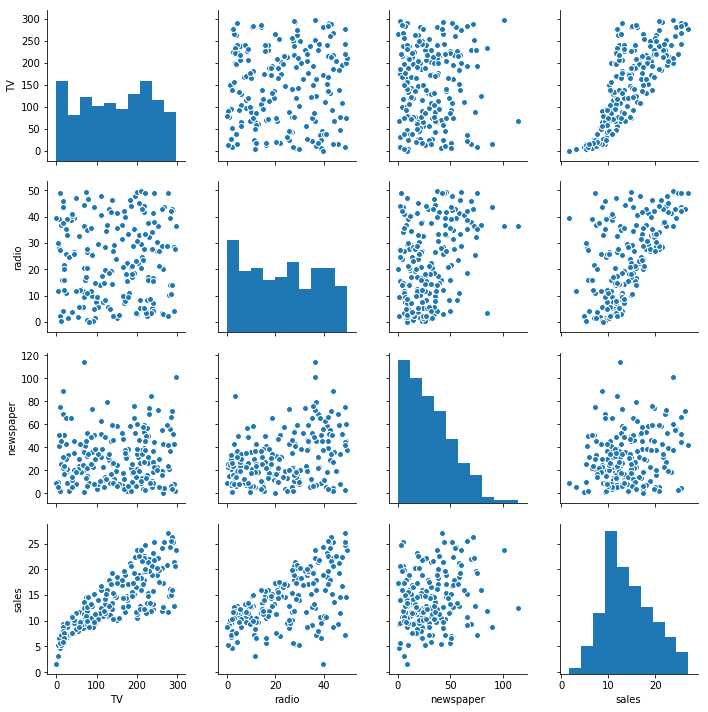

In [10]:
# seaborne 패키지를 이용해 feature들의 scatter plot을 본다  
seaborn.pairplot(advertising)

KeyError: 'Sales'

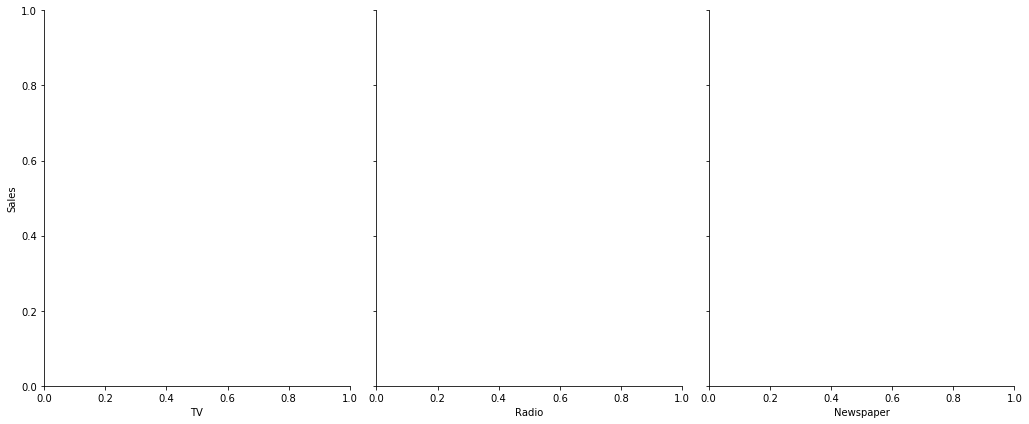

In [11]:
# 'Sales'와 feature들간의 관계만을 scatterplot으로 나타내고, 
# R의 ggplot에서와 같이 regression line과 95% 신뢰대역을 나타내도록 함 ('kind='reg').
seaborn.pairplot(data=advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=6, aspect=0.8, kind='reg') 

In [12]:
Corrplot(advertising).plot(fontsize='large')    # R style Corrplot 
plt.show()

ModuleNotFoundError: No module named 'colormap'

- Sales와 TV간 ***강한 정비례*** 관계가 있다 

## 3.1 Simple Linear Regression : *feature가 1개*


$Y = \beta_0 + \beta_1X$

- $Y$ : response/output/target 
- $X$ : feature/input/predictor
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $X$

Response(Y)로 *sales*, 1개의 feature(X)를 *TV*로 삼으면, 

$sales = \beta_0 + \beta_1TV$

- $\beta_0$ 와 $\beta_1$ 들을 **model coefficients (또는 weight)** 라 함 
- **simple linear regression의 학습** : **sales**와 **TV** 관계에 가장 맞는(RSS를 최소화하는) 선형식을 구성하는 $\beta_0$와 $\beta_1$을 데이터를 보고 학습해 추정한다

## Estimating the Coefficients of Linear Model 
***Statsmodels*** 을 사용해 **advertising** 데이터에 대한 linear regression 모델의 coefficient 추정
- ### [statsmodels version 0.5](http://statsmodels.sourceforge.net/stable/example_formulas.html) 부터 R 스타일 formula 형태 추가   

## Statsmodels의 Linear Model 사용하기
1. **모델 import** : 우리는 위에서 이미 "import statsmodels.formula.api as smf" 하여 관련 모듈(api)를 'smf' 라는 alias로 가져옴
2. **모델 instantiate** : 클래스 생성자를 이용해 모델을 만듬. 이 때 argument로 regression formula 포함
3. **학습 시킴** : instantiate된 모델 객체에게 fit() 명령을 내려 학습/훈련시키고, 학습된 모델을 반환 받음
4. **학습된 모델 활용** : 학습된 모델을 이용해 새로운 입력에 대해 예측을 하던가 등, 적절한 일거리를 줌


In [13]:
# 1. 모델 import : 모델을 포함하는 모듈을 이미 import 했음  

# 2. Model Instantiation: Ordinary Least Squares (ols) 방식 linear regression 모델 만들기
#    - 입력 데이터는 DataFrame 타입 

lm = smf.ols(formula='Sales ~ TV', data=advertising)   

# 'advertising' DataFrame에서 'Sales' column을 resonse로, 'TV' column을 feature로 하는
#  linear regression 모델을 만들었음 

# 3. 모델에게 학습 시키고, 그 결과인 (학습된) 모델을 'lm_learned'으로 받음 
lm_learned = lm.fit()

# 학습된 모델의 coefficients
lm_learned.params

# lm.pvalues            # p values
# lm.rsquared           # R-squared statistic 

PatsyError: Error evaluating factor: NameError: name 'Sales' is not defined
    Sales ~ TV
    ^^^^^

- **lm_learned._Tab_를 쳐서 'lm_learned' 객체에 어떤 method를 쓸 수 있는 지 보도록**
  

In [14]:
# 보통은 위 2 & 3번 과정을 연결(chaining)함  
lm = smf.ols(formula='Sales ~ TV', data=advertising).fit()   
# 학습한 모델 (즉, fit model)이 만들어졌음

print ("Coeffients:\n%s \n\np-values:\n%s , \n\nr-squared: %s " % (lm.params, lm.pvalues, lm.rsquared))

PatsyError: Error evaluating factor: NameError: name 'Sales' is not defined
    Sales ~ TV
    ^^^^^

### 다음 두 개의 cell은  response와 feature간의 관계를 시각화하는 또 다른 예 

In [15]:
# Sales를 Y-축에, TV 광고비를 X-축에 놓은 scatter plot을 그리자   
plt.scatter(advertising.TV, advertising.Sales)
plt.xlabel("TV (in 1000's)")
plt.ylabel("Sales (in 1000's)")

# 위 plot에 simple regression 선을 overlay 
X = pd.DataFrame({'TV':[advertising.TV.min(), advertising.TV.max()]})
Y_pred = lm.predict(X)
plt.plot(X, Y_pred, c='red')
plt.title("Simple Linar Regression")

AttributeError: 'DataFrame' object has no attribute 'Sales'

In [16]:
# seaborn 패키지를 이용할 수도 
seaborn.regplot(advertising.TV, advertising.Sales, order=1, ci=None, scatter_kws={'color':'r'})
plt.xlim(-50,350)
plt.ylim(ymin=0);

AttributeError: 'DataFrame' object has no attribute 'Sales'

In [17]:
lm.summary()     #  모델 전체 요약. R의 summary() 함수와 비슷 

NameError: name 'lm' is not defined

In [18]:
# ISLR - Table 3.1
lm.summary().tables[1]

NameError: name 'lm' is not defined

In [19]:
st(advertising)

<class 'pandas.core.frame.DataFrame'> : dimension of (200, 4)
Index: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ...  : int64 

TV         float64  [[230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, ...
radio      float64  [[37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19...
newspaper  float64  [[69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11...
sales      float64  [[22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2...


## 학습된 모델 활용: 예측과 관련 이슈 들 
- 위에서 만든 모델 lm은 Advertising의 TV 변수만을 feature로 사용해 만들었음
- 위의 R-squared 값 0.612 이나 Residual은 모델을 만들 때 사용한 데이터 (Training set)를 이용해 구한 Training Performance  
- 예측분석의 목표는 training set에 대해 좋은 성능을 보이는 모델을 만듬이 아니라, 처음 보게 될 (미래)의 out-of-sample 데이터에 대해 좋은 성능을 보일 것 같은 모델을 만드는 것 (즉, generalize 잘 하여 out-of-sample 성능이 좋은 모델)
- 미래의 데이터가 지금 존재하지 않는데 현재의 모델이 미래에 어떻게 동작할 지 짐작할 수 있을까? -> **모델 평가 **


#### 예측 : 만들어진 모델 (lm)을 이용해 새로운 predictor 값 (TV)을 줄 때 'Sales' 예측은? 
- 가령, TV = 100 일 때 Sales 예측

In [20]:
# statsmodel formula 인터페이스는 입력을 pandas의 DataFrame 같은 array 형태 데이터 구조로 주어야 함 
x_new = pd.DataFrame({'TV': [100]})    # dictionary로 df를 만드는 일반 방법 
# x_new.info()
x_new.head()

,TV
0,100


### 4. 예측 : 아래에서와 같이 'predict' 메소드를 이용 
- ** predict() 의 입력이 DataFrame 같이 array 형태로 training에 사용했던 feature들을 갖고 있어야 함**

In [21]:
lm.predict(x_new)    # 결과인 예측치를 numpy의 ndarray로 반환 

NameError: name 'lm' is not defined

### 손으로 계산하여 확인하면; 
$$y = \beta_0 + \beta_1x$$
$$y = 7.0326 + 0.0475 \times x$$

In [22]:
sales_manual = lm.params.Intercept + lm.params.TV * 100
print("Manual Calculation : %6f" % sales_manual)

NameError: name 'lm' is not defined

In [23]:
X_new = pd.DataFrame({'TV': [100, 422, 74]})   # TV가 100, 422, 또는 74일때 Sales 예측은? 
lm.predict(X_new)

NameError: name 'lm' is not defined




# Multiple Linear Regression

**multiple linear regression**: 여러 feature들을 사용해 response 추정 

$Y = \beta_0 + \beta_1X_1 + ... + \beta_nX_n$

***Advertising***의 TV, Radio, Newspaper들을 feature로 하고, Sales를 response로 한 multiple linear regression :

$Sales = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$


In [24]:
lm_mul = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=advertising).fit()
lm_mul.summary()

PatsyError: Error evaluating factor: NameError: name 'Newspaper' is not defined
    Sales ~ TV + Radio + Newspaper
                         ^^^^^^^^^

### 결과 해석
- F statistic의 p-value가 매우 작으므로 (1.58e-96)  모델은 유효 (최소한 1개 이상의 variable이 response와 관련)
- TV와 Radio의 p-value는 의미있음.  하지만 Newspaper의 p-value는 0.86에 달하므로 "Newspaper가 response와 관련이 없다"라는 null-hypothesis를 거부할 수 없음. 따라서 Newspaper 변수를 모델에 포함하기에는 적합하지 않음 
- **R-squared**가 0.89로 simple linear regression (0.612) 때보다 증가. 이 모델이 최소한 simple linear regression 보다 traning set의 response를 더 잘 설명(예측)한다고 생각할 수 있음. 
- 주의: 이 R-squared는 모델을 만들 때 데이터 (즉, training set에)에 대해서 구한 것이기에 실제 환경에서도 (out-of-sample) 더 좋은 특성을 보이는 지는 확신할 수 없음 
- **Cross-validation**와 같은 평가 방법을 통해 모델이 **out-of-sample**에 대해서도 **generalize** 잘 할까 짐작해 볼 수 있음 --> 나중에 

In [25]:
lm_mul.summary().tables[1]               # Table 3.4 of ISLR 

NameError: name 'lm_mul' is not defined

In [26]:
advertising.corr()     # Table 3.5 of ISLR : correlation matrix (상관 관계)

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


## 3.3   Other Considerations in the Regression Model

### Qualitative Predictors

In [27]:
# Load 'credit' data from local file system 
credit = pd.read_csv('../Data/Credit.csv', usecols=list(range(1,12)))
credit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


- 위 feature들의 data type (dtypes)에서 float64, int64와 같이 숫자가 아닌 'object' 인 것들은 대부분 string 타입또는 다른 클래스 타입. 이것들이 category 타입 변수일 가능성 많음.
- Feature중 Gender, Student, Married, Ethnicity 변수가 qualitative(categorical) 변수
- 400개의 row/observation이 있는데, 모든 feature들이 400 개의 non-null 값을 지님. 즉, missing value가 없음

In [28]:
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580


In [29]:
credit.isnull().sum()           # 다시 missing value 없음을 확인 

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

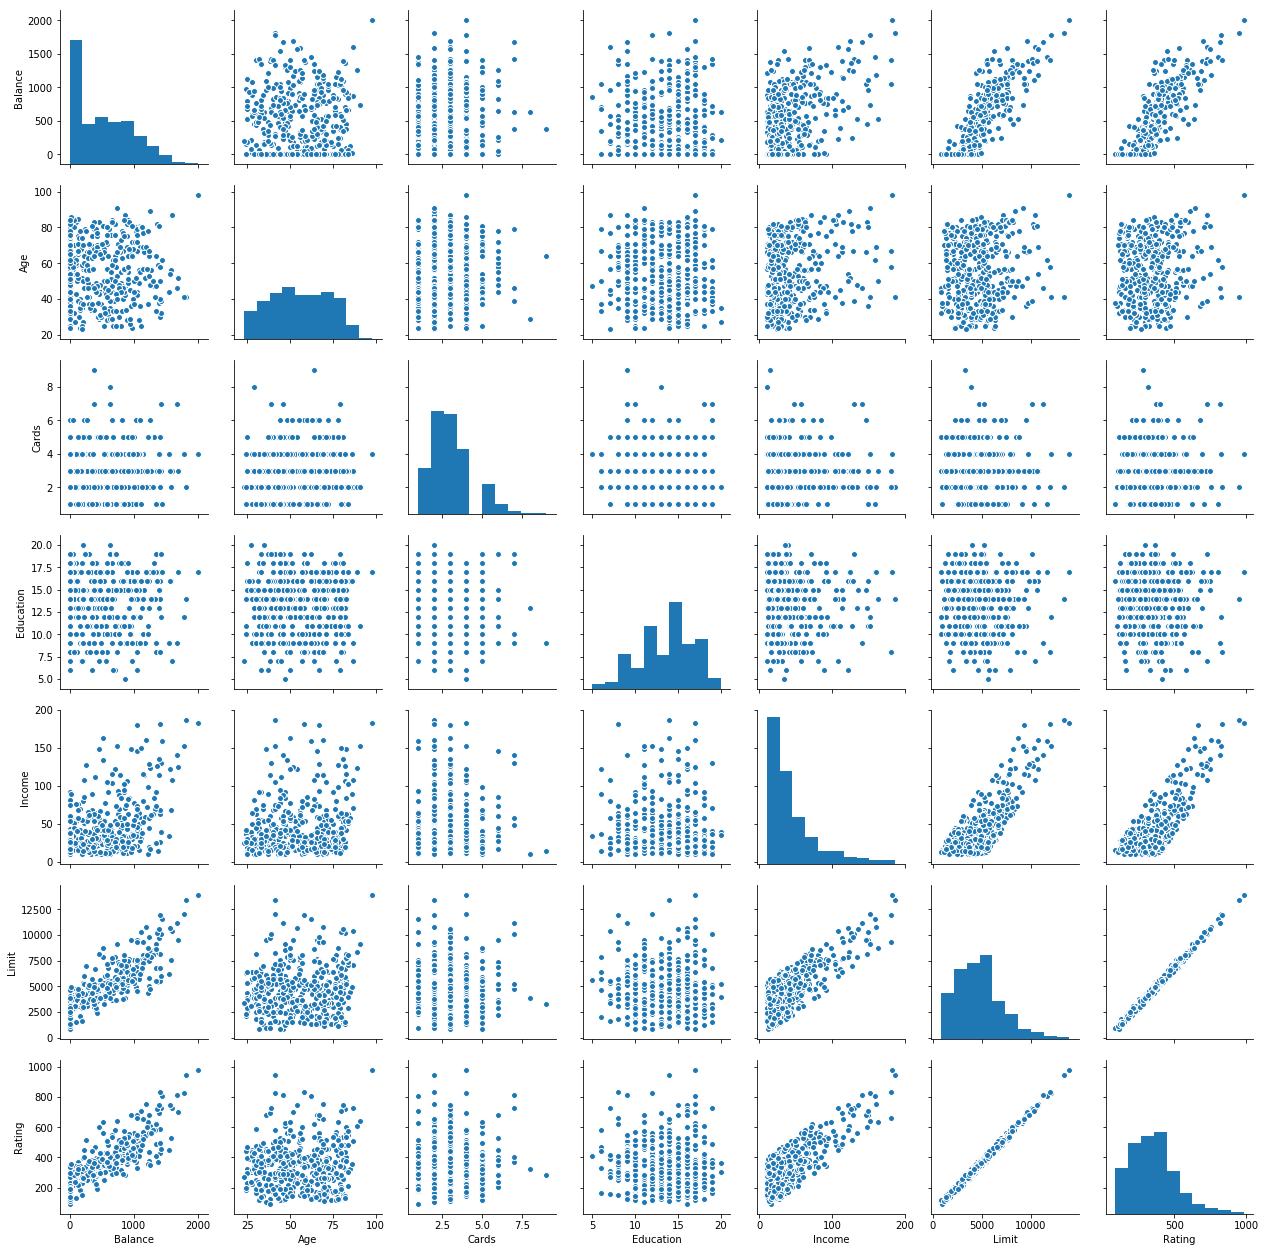

In [30]:
seaborn.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']])  # ISLR - Fig 3.6
# 실행 시간이 조금 걸림.  Wait.

In [31]:
Corrplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']]).plot(fontsize='large')     
plt.show()

ModuleNotFoundError: No module named 'colormap'

Interpreting the ***corrplot***
- 파란색(붉은색)으로 갈수록 Positive(Negative) Correlation
- 긹죽한 타원형태가 될수록 correlation이 강함   

In [32]:
credit.Gender.unique()               # Gender 변수는 단 2개의 category를 갖음    

array([' Male', 'Female'], dtype=object)

## 카테고리형 변수 'Gender'를 feature로 활용

In [33]:
lm_cat = smf.ols(formula='Balance ~ Gender', data=credit).fit()   # Gender has 2 levels -> 1 dummy variable
lm_cat.summary().tables[1]          # ISLR - Table 3.7  

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Gender[T.Female],19.7331,46.051,0.429,0.669,-70.801,110.267


In [34]:
# Regression of Balance onto Ethnicity
lm_cat_Eth = smf.ols('Balance ~ Ethnicity', credit).fit()
lm_cat_Eth.summary()            # Table 3.8 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Thu, 12 Oct 2017   Prob (F-statistic):              0.957
Time:                        10:10:43   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                531.0000     46.319     11.464      0.000     439.939     622.061
Ethnicity[T.Asian]       -18.6863     65.021     -0.287      0.774    -146.515     109.142
Ethnicity[T.Caucasian]   -12.5025     56.681     -0.221      0.826    -123.935      98.930
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- F-statistic p-value가 0.957에 달해 'Balance와 Ethnicity간 관련이 없다'는 null hypothesis를 거부할 수 없기에 이 데이터에 따르면 null hypothesis를 따른는 것이 좋다.  즉, 이 모델은  **꽝!**

In [35]:
st(credit)

<class 'pandas.core.frame.DataFrame'> : dimension of (400, 11)
Index: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ...  : int64 

Income     float64  [[14.890999999999998, 106.025, 104.59299999999...
Limit        int64  [[3606, 6645, 7075, 9504, 4897, 8047, 3388, 71...
Rating       int64  [[283, 483, 514, 681, 357, 569, 259, 512, 266,...
Cards        int64                            [[2, 3, 4, 5, 1, 6, 7]]
Age          int64  [[34, 82, 71, 36, 68, 77, 37, 87, 66, 41, 30, ...
Education    int64  [[11, 15, 16, 10, 12, 9, 13, 19, 14, 7, 17, 8,...
Gender      object                                  [[ Male, Female]]
Student     object                                        [[No, Yes]]
Married     object                                        [[Yes, No]]
Ethnicity   object             [[Caucasian, Asian, African American]]
Balance      int64  [[333, 903, 580, 964, 331, 1151, 203, 872, 279...


**변수들 중 'Ethnicity'만 제외하려면 - formula에 feature 다 나열하기 귀찮음. 뒤에... **

In [36]:
lm_all = smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + Gender + Student + Married', credit).fit()
lm_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     918.2
Date:                Thu, 12 Oct 2017   Prob (F-statistic):          2.49e-256
Time:                        10:10:53   Log-Likelihood:                -2399.4
No. Observations:                 400   AIC:                             4819.
Df Residuals:                     390   BIC:                             4859.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -468.4037     34.355    -13.634      0.000    -535.948    -400.859
Gender[T.Female]   -10.4067      9.904     -1.051      0.294     -29.879       9.065
Student[T.Yes]     426.4692     16.678     25.571      0.000     393.680     459.259
Married[T.Yes]      -7.0191     10.278     -0.683      0.495     -27.226      13.188
Income              -7.8020      0.234    -33.349      0.000      -8.262      -7.342
Limit                0.1931      0.033      5.909      0.000       0.129       0.257
Rating               1.1023      0.489      2.253      0.025       0.140       2.064
Cards               17.9233      4.332      4.137      0.000       9.406      26.441
Age                 -0.6347      0.293     -2.164      0.031      -1.211      -0.058
Education           -1.1150      1.596     -0.699      0.485      -4.253       2.023
==============================================================================
Omnibus:                       34.234   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.854
Skew:                           0.775   Prob(JB):                     1.34e-09
Kurtosis:                       3.217   Cond. No.                     3.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


## Removing the Additive Assumptions : 변수간 Interaction 

In [37]:
# TV와 Radio간 interaction term을 주고 linear model을 만들면
lm_interact = smf.ols('Sales ~ TV + Radio + TV:Radio', advertising).fit()
lm_interact.summary().tables[1]             # Table 3.9

PatsyError: Error evaluating factor: NameError: name 'Sales' is not defined
    Sales ~ TV + Radio + TV:Radio
    ^^^^^

- TV와 Radio간 interaction이 유효



In [38]:
smf.ols('Sales ~ TV*Radio', advertising).fit().summary().tables[1]      # 앞의 formula를 이렇게 표현 가능  

PatsyError: Error evaluating factor: NameError: name 'Sales' is not defined
    Sales ~ TV*Radio
    ^^^^^

In [39]:
smf.ols('Sales ~ TV + Newspaper*Radio', advertising).fit().summary()

PatsyError: Error evaluating factor: NameError: name 'Newspaper' is not defined
    Sales ~ TV + Newspaper*Radio
                 ^^^^^^^^^

- Newspaper와 Radio간 interaction은 유효하지 않음  


### Interaction between qualitative variable and a quantitative variable

In [40]:
# Income(quantitative) 과 Student(qualitative with 2 levels)간 Interaction이 없다하고 모델을 학습하면;
lm_no_interact = smf.ols('Balance ~ Income  + Student', credit).fit()   
lm_no_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     76.22
Date:                Thu, 12 Oct 2017   Prob (F-statistic):           9.64e-29
Time:                        10:11:18   Log-Likelihood:                -2954.4
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     397   BIC:                             5927.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        211.1430     32.457      6.505      0.000     147.333     274.952
Student[T.Yes]   382.6705     65.311      5.859      0.000     254.272     511.069
Income             5.9843      0.557     10.751      0.000       4.890       7.079
==============================================================================
Omnibus:                      119.719   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.617
Skew:                           0.252   Prob(JB):                     7.44e-06
Kurtosis:                       1.922   Cond. No.                         192.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# ncome(quantitative) 과 Studen(qualitative with 2 levels)간 Interaction이 있게 만들면;
lm_interact = smf.ols('Balance ~ Income*Student', credit).fit()
lm_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.30
Date:                Thu, 12 Oct 2017   Prob (F-statistic):           4.94e-28
Time:                        10:11:21   Log-Likelihood:                -2953.7
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     396   BIC:                             5931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               200.6232     33.698      5.953      0.000     134.373     266.873
Student[T.Yes]          476.6758    104.351      4.568      0.000     271.524     681.827
Income                    6.2182      0.592     10.502      0.000       5.054       7.382
Income:Student[T.Yes]    -1.9992      1.731     -1.155      0.249      -5.403       1.404
==============================================================================
Omnibus:                      107.788   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.158
Skew:                           0.228   Prob(JB):                     1.54e-05
Kurtosis:                       1.941   Cond. No.                         309.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 'Income'과 'Student' 사이의 interaction이 없다고 생각하는 것이 옳으며, 이는 R-square 값이 거의 증가하지 않은 것을 통해서도 짐작할 수 있다.


### Non-linear relationships using polynomial regressions

In [42]:
# load 'Auto' data
auto = pd.read_csv('../Data/Auto.csv')
auto.info()
auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


**(중요) horsepower 변수가 숫자이어야 함. 그런데, 위의 auto.info()로 본 horsepower 변수 타입이 'object'로 되어 있음.  즉 숫자가 아니라고 함.  auto.head()로 보니 처음에는 분명 숫자.  따라서 horsepower 변수 중간 어디 즈음 숫자가 아닌 것이 있음 **

In [43]:
# Find out whick rows have non-numeric value on 'horsepower' column
auto_problem = auto[auto.horsepower.apply(lambda x: not(x.isnumeric()))]
auto_problem

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


5개의 observation 들이 'horsepower' feature에 숫자가 아님.  원본 auto.csv 를 보고 확인  
- 위의 row들을 제거할 수도 있고, 또는 파일을 읽을 때 위의 문제가 있는 row들을 제거하고 읽을 수도 있음 

In [44]:
# Read the data again. This time skipping problematic rows 
auto = pd.read_csv('../Data/Auto.csv', na_values='?').dropna()
auto.info()
auto.iloc[28: 34, :]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
28,9.0,8,304.0,193.0,4732,18.5,70,1,hi 1200d
29,27.0,4,97.0,88.0,2130,14.5,71,3,datsun pl510
30,28.0,4,140.0,90.0,2264,15.5,71,1,chevrolet vega 2300
31,25.0,4,113.0,95.0,2228,14.0,71,3,toyota corona
33,19.0,6,232.0,100.0,2634,13.0,71,1,amc gremlin
34,16.0,6,225.0,105.0,3439,15.5,71,1,plymouth satellite custom


- 문제있는 row들이 제거됨을 확인


### mpg를 $horsepower$ 와  $horsepower^2$ 에 대해 regression 

In [45]:
# OLS regression of mpg onto horsepower and squared(horsepower)
lm_quadratic = smf.ols('mpg ~ horsepower + np.square(horsepower)', data=auto).fit()
lm_quadratic.summary().tables[1]             # ISLR - Table 3.10

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
np.square(horsepower),0.0012,0.000,10.080,0.000,0.001,0.001


In [46]:
# Polynomial regression upto 3'rd degree 
lm_deg3 = smf.ols('mpg ~ horsepower + np.power(horsepower,2) +  np.power(horsepower,3)', data=auto).fit()
lm_deg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     285.5
Date:                Thu, 12 Oct 2017   Prob (F-statistic):           8.41e-98
Time:                        10:11:42   Log-Likelihood:                -1132.8
No. Observations:                 392   AIC:                             2274.
Df Residuals:                     388   BIC:                             2289.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  60.6848      4.563     13.298      0.000      51.713      69.657
horsepower                 -0.5689      0.118     -4.824      0.000      -0.801      -0.337
np.power(horsepower, 2)     0.0021      0.001      2.193      0.029       0.000       0.004
np.power(horsepower, 3) -2.147e-06   2.38e-06     -0.903      0.367   -6.82e-06    2.53e-06
==============================================================================
Omnibus:                       16.987   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.528
Skew:                           0.204   Prob(JB):                     3.18e-08
Kurtosis:                       4.395   Cond. No.                     5.53e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R의 poly()같은 함수 만드는 것은 쉬움. 함수로 만들 가치 없음 .